# Prediction on test set

---

In [1]:
from keras.models import Model, load_model, Sequential
from keras.models import model_from_json

/home/ai/anaconda3/envs/keras_tensorflow_gpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ai/anaconda3/envs/keras_tensorflow_gpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Model reconstruction from JSON file
with open('../models/model_architecture_15-11-2018-input_d10-d50.json', 'r') as f:
    model = model_from_json(f.read())

model.load_weights('../models/vad_15-11-2018_lr_0.00025_drop_0.05_0.05.h5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5511, 101)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1375, 196)         297136    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1375, 196)         784       
_________________________________________________________________
activation_1 (Activation)    (None, 1375, 196)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1375, 196)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1375, 128)         124800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1375, 128)         0         
__________

---

In [4]:
import IPython

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

In [5]:
def graph_spectrogram(wav_filename, rate=None, data=None):
    ''' Calculate and plot spectrogram for a wav audio file. '''
    if data is None:
        rate, data = get_wav_info(wav_filename)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

def get_wav_info(wav_filename):
    ''' Load a wav file. '''
    rate, data = wavfile.read(wav_filename)
    return rate, data

def predict(model, wav_filename, show_graphs=False):
    if show_graphs:
        plt.subplot(2, 1, 1)  # spectrogram on top

    x = graph_spectrogram(wav_filename)

    # the spectogram outputs (freqs, Tx) and we want (Tx, freqs) to input into the model
    x = x.swapaxes(0,1)
    x = np.expand_dims(x, axis=0)

    predictions = model.predict(x)

    if show_graphs:
        plt.subplot(2, 1, 2)  # probability plot at the bottom
        plt.plot(predictions[0,:,0])
        plt.ylabel('probability')
        plt.show()

    return predictions

---

# Music and dialog

In [6]:
wav_filename = '../data/test_set_wav/test_with_dialog_00100.wav'
IPython.display.Audio(wav_filename)

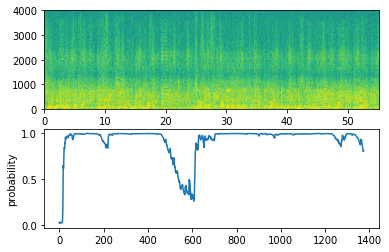

In [7]:
predictions = predict(model, wav_filename, show_graphs=True)

# Music Only

In [8]:
wav_filename = '../data/test_set_wav/test_without_dialog_00401.wav'
IPython.display.Audio(wav_filename)

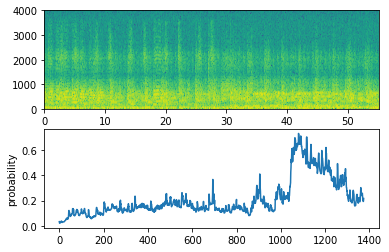

In [9]:
predictions = predict(model, wav_filename, show_graphs=True)

---

# Live Recording

In [12]:
wav_filename = 'audio_examples/live_dialog_00002.wav'
IPython.display.Audio(wav_filename)

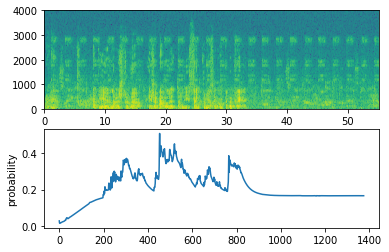

In [11]:
predictions = predict(model, wav_filename, show_graphs=True)